In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def load_dataset():
    all_data = []
    all_labels = []

    for file in os.listdir():
        if file.endswith(".csv"):
            df = pd.read_csv(file, header=None)
            all_data.append(df.iloc[:, :-1].values)
            all_labels.extend(df.iloc[:, -1].values)

    X = np.vstack(all_data)
    y = np.array(all_labels)

    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    return X, y_encoded, encoder

In [3]:
X, y, encoder = load_dataset()
num_classes = len(encoder.classes_)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(126,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min')
earlystop_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb]
)

Epoch 1/50
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1946 - loss: 3.1925

28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.2041 - loss: 3.1433 - val_accuracy: 0.1306 - val_loss: 3.3827 - learning_rate: 0.0010
Epoch 2/50
23/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6742 - loss: 1.2037

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6786 - loss: 1.1867 - val_accuracy: 0.0991 - val_loss: 3.2997 - learning_rate: 0.0010
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7745 - loss: 0.7905

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7753 - loss: 0.7889 - val_accuracy: 0.1216 - val_loss: 3.1851 - learning_rate: 0.0010
Epoch 4/50
25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8431 - loss: 0.5510

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8467 - loss: 0.5442 - val_accuracy: 0.1441 - val_loss: 3.0530 - learning_rate: 0.0010
Epoch 5/50
26/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9111 - loss: 0.3715

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9113 - loss: 0.3710 - val_accuracy: 0.1847 - val_loss: 2.9301 - learning_rate: 0.0010
Epoch 6/50
24/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9470 - loss: 0.2714

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9471 - loss: 0.2705 - val_accuracy: 0.1622 - val_loss: 2.8033 - learning_rate: 0.0010
Epoch 7/50
25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9802 - loss: 0.1652

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9802 - loss: 0.1651 - val_accuracy: 0.1892 - val_loss: 2.6115 - learning_rate: 0.0010
Epoch 8/50
25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9585 - loss: 0.1582

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9580 - loss: 0.1616 - val_accuracy: 0.3829 - val_loss: 2.4260 - learning_rate: 0.0010
Epoch 9/50
25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9782 - loss: 0.1438

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9775 - loss: 0.1446 - val_accuracy: 0.5405 - val_loss: 2.0625 - learning_rate: 0.0010
Epoch 10/50
25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9744 - loss: 0.1376

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9735 - loss: 0.1394 - val_accuracy: 0.5000 - val_loss: 1.8911 - learning_rate: 0.0010
Epoch 11/50
25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9829 - loss: 0.1218

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9822 - loss: 0.1221 - val_accuracy: 0.5631 - val_loss: 1.6316 - learning_rate: 0.0010
Epoch 12/50
26/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9765 - loss: 0.1116

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9769 - loss: 0.1111 - val_accuracy: 0.7658 - val_loss: 1.1790 - learning_rate: 0.0010
Epoch 13/50
24/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9829 - loss: 0.0890

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9826 - loss: 0.0889 - val_accuracy: 0.8649 - val_loss: 0.9414 - learning_rate: 0.0010
Epoch 14/50
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9717 - loss: 0.1180

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9722 - loss: 0.1166 - val_accuracy: 0.8559 - val_loss: 0.7965 - learning_rate: 0.0010
Epoch 15/50
26/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9928 - loss: 0.0769

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9920 - loss: 0.0775 - val_accuracy: 0.8829 - val_loss: 0.6679 - learning_rate: 0.0010
Epoch 16/50
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9589 - loss: 0.1272

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9595 - loss: 0.1268 - val_accuracy: 0.9550 - val_loss: 0.3289 - learning_rate: 0.0010
Epoch 17/50
25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9837 - loss: 0.0743

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9833 - loss: 0.0755 - val_accuracy: 0.9640 - val_loss: 0.2084 - learning_rate: 0.0010
Epoch 18/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9814 - loss: 0.0733 - val_accuracy: 0.9144 - val_loss: 0.3079 - learning_rate: 0.0010
Epoch 19/50
26/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9864 - loss: 0.0691

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9859 - loss: 0.0694 - val_accuracy: 0.9955 - val_loss: 0.0883 - learning_rate: 0.0010
Epoch 20/50
25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9837 - loss: 0.0635

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9841 - loss: 0.0635 - val_accuracy: 0.9910 - val_loss: 0.0873 - learning_rate: 0.0010
Epoch 21/50
25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9866 - loss: 0.0792

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9874 - loss: 0.0761 - val_accuracy: 0.9955 - val_loss: 0.0318 - learning_rate: 0.0010
Epoch 22/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9913 - loss: 0.0435 - val_accuracy: 0.9775 - val_loss: 0.0764 - learning_rate: 0.0010
Epoch 23/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9726 - loss: 0.1057 - val_accuracy: 0.9685 - val_loss: 0.1042 - learning_rate: 0.0010
Epoch 24/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9859 - loss: 0.0714
Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9857 - loss: 0.0718 - val_accuracy: 0.9955 - val_loss: 0.0336 - learning_rate: 0.0010
Epoch 25/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9791 - loss: 0.0684 - val_accuracy: 0.9505 - val_loss: 0.1091 - learning_rate: 5.0000e-04
Epoch 26/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9792 - loss: 0.0587 - val_accur

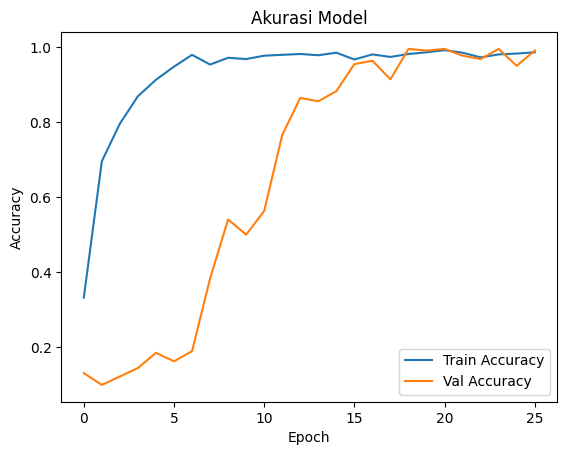

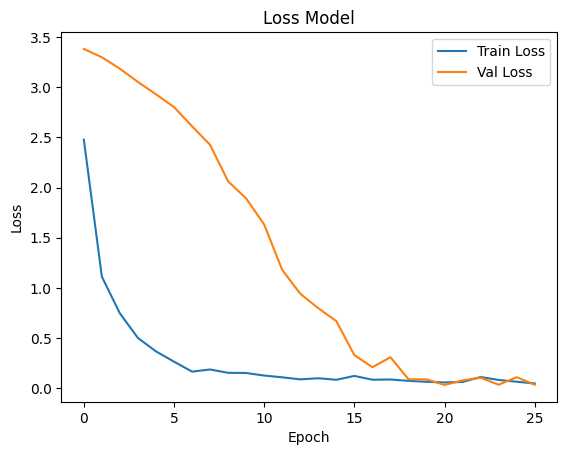

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Akurasi Model')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Model')
plt.show()

In [14]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=16)
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_acc:.4f}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9924 - loss: 0.0366
Validation loss: 0.0318
Validation accuracy: 0.9955


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


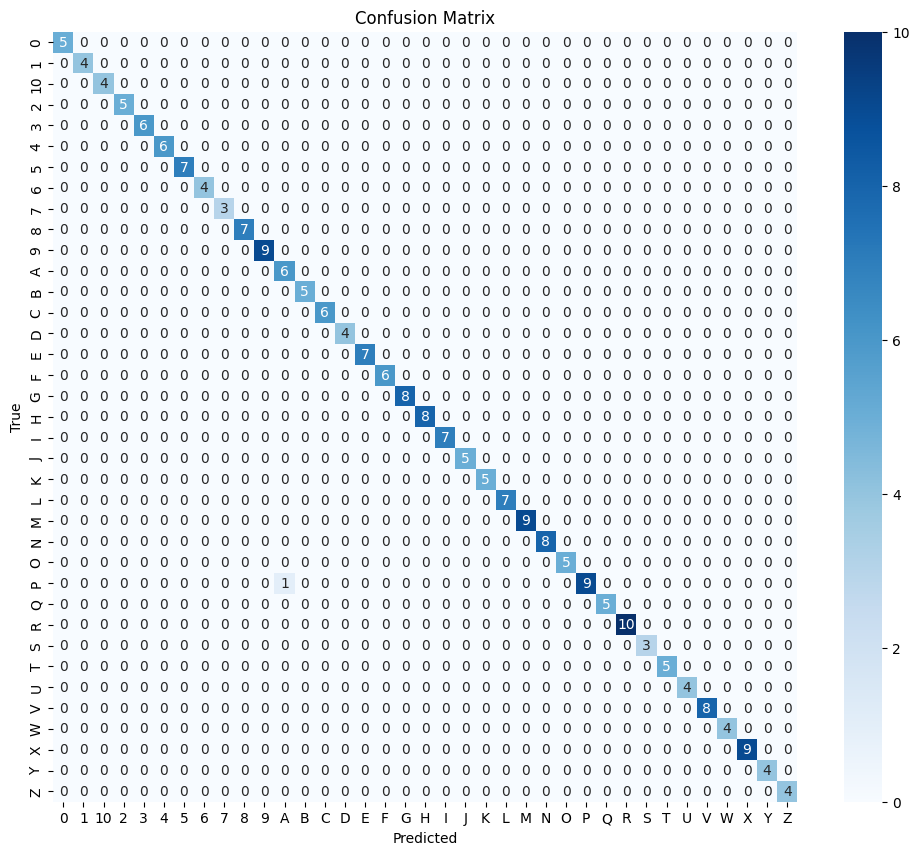

In [10]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [11]:
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         9
           A       0.86      1.00      0.92         6
           B       1.00      1.00      1.00         5
           C       1.00      1.00      1.00         6
           D       1.00      1.00      1.00         4
           E       1.00      1.00      1.00         7
           F       1.00      1.00      1.00         6
           G       1.00    

In [12]:
np.save("label_classes.npy", encoder.classes_)

In [13]:
# Load model .h5
model = tf.keras.models.load_model("best_model.h5")

# Konversi ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan file .tflite
with open("best_model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpb4053jye'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 126), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 37), dtype=tf.float32, name=None)
Captures:
  135073224352656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135073224350544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135073224352080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135073224350160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135073224348432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135073224350352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135073172108496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135073172110992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135073172109072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135074922368464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135073172109264: Tenso